# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas

import pandas as pd
import numpy as np

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [5]:
# Your code here:
# resource: https://stackoverflow.com/questions/44117326/how-can-i-remove-all-non-numeric-characters-from-all-the-values-in-a-particular
# dfObject['C'] = dfObject['C'].str.extract('(\d+)', expand=False).astype(int)

# Need to first throw in a NP.where (conditional, does this end with K? if so, do this, if not, do this)


fifa['ValueNumeric'] = fifa['Value'].str.extract('(\d+)', expand = False).astype(int)

fifa['ValueNumeric'].head()

0    110
1     77
2    118
3     72
4    102
Name: ValueNumeric, dtype: int64

#### We'd like to determine whether a player's preferred foot and position have an impact on their value. 

~Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.~

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [26]:
# Your code here:
from scipy.stats import f_oneway

# one column - footedness
# another column - position
# values = valuenumeric

In [70]:
# fifa_pivot = fifa.pivot(index = ['Preferred Foot', 'Position'], values= 'ValueNumeric')
# fifa_group = fifa.groupby(['Preferred Foot', 'Position'])['ValueNumeric']

# visually inspect
fifa_pivot = fifa.pivot_table(index = 'Preferred Foot', columns = 'Position', values = 'ValueNumeric').transpose()
fifa_pivot

Preferred Foot,Left,Right
Position,,
CAM,237.335938,250.443020
CB,321.149560,284.361169
CDM,302.952381,285.075426
CF,359.888889,227.410714
CM,274.542169,263.597380
GK,226.233010,234.548653
LAM,11.888889,165.416667
LB,293.858126,269.647799
LCB,272.579545,239.726562


In [87]:
fifa.columns = [column.replace(' ', '_') for column in fifa.columns]

fifa_l = fifa.query("Preferred_Foot == 'Left'")
fifa_r = fifa.query("Preferred_Foot == 'Right'")

# fifa_l.head()

In [90]:
fifa_l

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred_Foot,Position,Weak_Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110
13,David Silva,32,Spain,90,90,Manchester City,€60M,Left,LCM,2.0,...,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,60
15,P. Dybala,24,Argentina,89,94,Juventus,€89M,Left,LF,3.0,...,83.0,80.0,65.0,88.0,48.0,32.0,84.0,87.0,86.0,89
17,A. Griezmann,27,France,89,90,Atlético Madrid,€78M,Left,CAM,3.0,...,85.0,83.0,62.0,82.0,69.0,35.0,91.0,83.0,79.0,78
19,T. Courtois,26,Belgium,89,90,Real Madrid,€53.5M,Left,GK,2.0,...,52.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18172,C. Hawkins,18,England,48,65,Burton Albion,€50K,Left,GK,3.0,...,31.0,22.0,41.0,5.0,18.0,6.0,5.0,30.0,15.0,50
18175,E. Clarke,19,England,48,59,Fleetwood Town,€40K,Left,LB,2.0,...,55.0,62.0,52.0,26.0,54.0,45.0,43.0,38.0,39.0,40
18191,J. Norville-Williams,18,England,47,65,Cambridge United,€50K,Left,LB,3.0,...,52.0,38.0,55.0,25.0,55.0,55.0,47.0,39.0,29.0,50
18200,J. Young,18,Scotland,47,62,Swindon Town,€60K,Left,ST,2.0,...,48.0,31.0,31.0,51.0,26.0,16.0,46.0,37.0,58.0,60


In [96]:
fifa_l_dummies = pd.get_dummies(fifa_l)

# fifa_r_dummies = pd.get_dummies(fifa_r, columns = 'Position') # error: Series object has no attribute columns

fifa_l_dummies.head()

,Age,Overall,Potential,Weak_Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,31,94,94,4.0,91.0,86.0,72.0,59.0,94.0,48.0,...,0,0,0,0,1,0,0,0,0,0
13,32,90,90,2.0,70.0,64.0,78.0,52.0,75.0,57.0,...,0,0,0,0,0,0,0,0,0,0
15,24,89,94,3.0,87.0,83.0,80.0,65.0,88.0,48.0,...,0,0,0,0,0,0,0,0,0,0
17,27,89,90,3.0,88.0,85.0,83.0,62.0,82.0,69.0,...,0,0,0,0,0,0,0,0,0,0
19,26,89,90,2.0,46.0,52.0,38.0,70.0,17.0,23.0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
p_val = f_oneway( *[fifa_pivot[col] for col in fifa_pivot]
)[1]

p_val # returns 0.0010930029893534109

0.6772576557910213

What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:
# This p-value is below the alpha of 0.05, so we REJECT the NULL Hypothesis that there was no statistically significant difference between the two groups


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [68]:
# Your code here:
# fifa_nationality = fifa.pivot_table(index = 'Nationality', columns = 'ValueNumeric')
# fifa_nationality.head()

fifa_nationality = fifa.pivot_table(index = 'Nationality', values = 'ValueNumeric')
fifa_nationality.head()

,ValueNumeric
Nationality,
Afghanistan,342.500000
Albania,294.250000
Algeria,231.816667
Andorra,290.000000
Angola,306.600000


In [69]:
p_val = f_oneway( *[fifa_nationality[col] for col in fifa_nationality] )[1]

p_val

/Users/sampoad/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3233: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / dfbn


nan

What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [100]:
# Your code here:
fifa.isna().sum()

fifa_nonull = fifa.dropna(axis = 0)

fifa_nonull.isna().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred_Foot    0
Position          0
Weak_Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [101]:
# Your code here:
# DEPENDENCIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# First, predict Value (the y value) using Stamina (the x value)
# uncover the linear regression line to create the model

from scipy.stats import linregress 

slope, intercept, r_squared, p_value, std_err = linregress( # spits back a tuple with all of those values
    fifa_nonull['Stamina'],
    fifa_nonull['ValueNumeric'],
)

slope, intercept, r_squared, p_value, std_err

(-0.3380577182702396,
 289.59386189217565,
 -0.018509756320771776,
 0.013222455665964408,
 0.13642539435168455)

In [103]:
# The r_squared value is very close to 0, so I would not expect a correlation between playerStamina and their response Value. the p-value is 0.01, lower than alpha = 0.05, so we do believe that stamina has some minor impact on Value.

In [102]:
# Second, predict Value (the y value) using Sprintspeed(the x value)
# uncover the linear regression line to create the model
slope, intercept, r_squared, p_value, std_err = linregress( # spits back a tuple with all of those values
    fifa_nonull['SprintSpeed'],
    fifa_nonull['ValueNumeric'],
)

slope, intercept, r_squared, p_value, std_err


(-0.030802968891424712,
 270.2201766335235,
 -0.001556373899021355,
 0.8349799771633264,
 0.1478623436084743)

again, the r_squared value is close to zero. the p-value of 0.83 is much higher than alpha = 0.05, so we believe that variations in Y (the Value) are indeed due to random chance

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:



Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [104]:
# Your code here:
slope, intercept, r_squared, p_value, std_err = linregress( # spits back a tuple with all of those values
    fifa_nonull['Potential'],
    fifa_nonull['ValueNumeric'],
)

slope, intercept, r_squared, p_value, std_err

(-11.148136554446813,
 1063.4157394447386,
 -0.2359756360739181,
 3.170868319815142e-225,
 0.34298343571919004)

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [105]:
# Your conclusions here:

# This r_squared value is -0.24, so my line of best fit is not a great model for predicting the response of Value using the Potential. The P-value is extremely, extremely small. And what is interesting is that the slope is quite negative. As Potential increases, ValueNumeric decreases.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

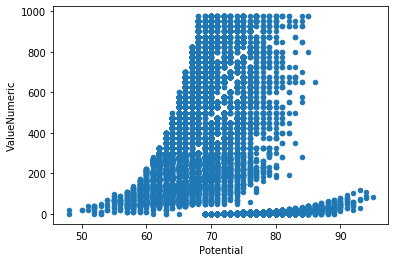

In [108]:
# Your code here:
fifa_nonull.plot(
    'Potential',
    'ValueNumeric',
    kind = 'scatter'
)

Visually, we can see it does not appear to be a linear relationship, but instead an exponential one? 